In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


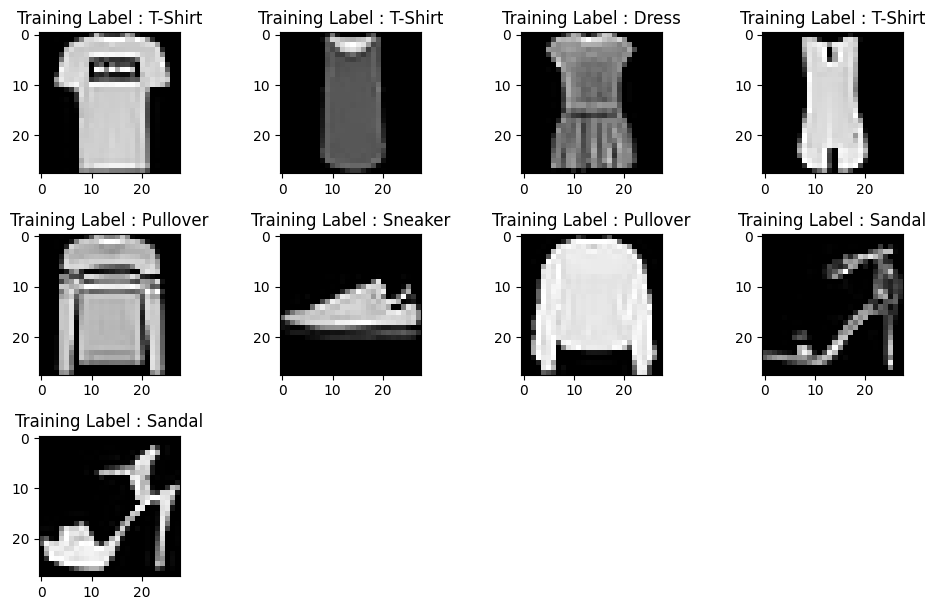

In [3]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [4]:
input_size = 784
out_size = 10

In [5]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, out_size)
)
#######################################

In [6]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#######################################

In [7]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU(inplace=True)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU(inplace=True)
  (5): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6970605522330636
Training loss: 0.6320407407592609
Training loss: 0.6481848204695085
Training loss: 0.6600558929351855
Training loss: 0.7527789508483049
Training loss: 1.092290533662859
Training loss: 1.219484962888364
Training loss: 1.2879986212706007
Training loss: 1.2328645740109465
Training loss: 1.6324504325384779


In [9]:
!pip install -U pip setuptools wheel
!pip install --only-binary=:all: "numpy==1.23.5"
!pip install d2l==0.17.5 --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


ERROR: Could not find a version that satisfies the requirement numpy==1.23.5 (from versions: 1.26.0, 1.26.1, 1.26.2, 1.26.3, 1.26.4, 2.0.0, 2.0.1, 2.0.2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.2.6, 2.3.0, 2.3.1, 2.3.2)
ERROR: No matching distribution found for numpy==1.23.5


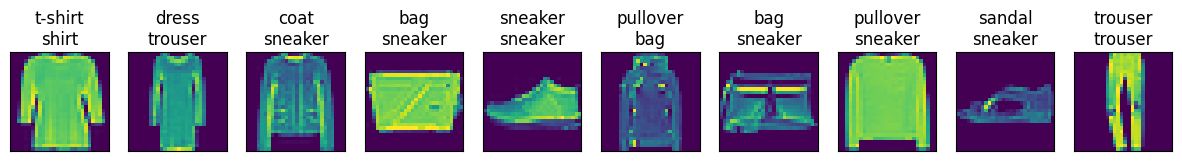

In [11]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model, testloader, n=10)

## Part b

In [12]:
subset_size = 500
indices = list(range(len(trainset)))
random.shuffle(indices)
small_indices = indices[:subset_size]
small_sampler = SubsetRandomSampler(small_indices)

trainloader_small = torch.utils.data.DataLoader(
    trainset, batch_size=64, sampler=small_sampler, shuffle=False
)

over_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024), nn.ReLU(inplace=True),
    nn.Linear(1024, 512), nn.ReLU(inplace=True),
    nn.Linear(512, 256), nn.ReLU(inplace=True),
    nn.Linear(256, 10)
)

over_criterion = nn.CrossEntropyLoss()
over_optimizer = optim.SGD(over_model.parameters(), lr=0.1, momentum=0.9)




In [13]:
epochs = 25
train_losses, test_losses = [], []
train_errors, test_errors = [], []

for e in range(epochs):
    over_model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader_small:
        images = images.view(images.shape[0], -1)
        over_optimizer.zero_grad()
        logits = over_model(images)
        loss = over_criterion(logits, labels)
        loss.backward()
        over_optimizer.step()

        running_loss += loss.item() * labels.size(0)
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / total
    train_acc = correct / total
    train_err = 1 - train_acc

    over_model.eval()
    running_loss_t, correct_t, total_t = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            logits = over_model(images)
            loss = over_criterion(logits, labels)
            running_loss_t += loss.item() * labels.size(0)
            preds = logits.argmax(1)
            correct_t += (preds == labels).sum().item()
            total_t += labels.size(0)

    avg_test_loss = running_loss_t / total_t
    test_acc = correct_t / total_t
    test_err = 1 - test_acc

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_errors.append(train_err)
    test_errors.append(test_err)

    print(f"Epoch {e+1:02d}/{epochs} | "
          f"train_loss={avg_train_loss:.4f} acc={train_acc:.3f} | "
          f"test_loss={avg_test_loss:.4f} acc={test_acc:.3f}")


Epoch 01/25 | train_loss=2.1146 acc=0.254 | test_loss=1.5272 acc=0.430
Epoch 02/25 | train_loss=1.4905 acc=0.436 | test_loss=1.2558 acc=0.495
Epoch 03/25 | train_loss=1.1129 acc=0.546 | test_loss=0.9209 acc=0.652
Epoch 04/25 | train_loss=0.8875 acc=0.628 | test_loss=0.8621 acc=0.662
Epoch 05/25 | train_loss=0.6998 acc=0.738 | test_loss=0.9455 acc=0.677
Epoch 06/25 | train_loss=0.7084 acc=0.742 | test_loss=0.9460 acc=0.634
Epoch 07/25 | train_loss=0.6270 acc=0.752 | test_loss=0.8540 acc=0.721
Epoch 08/25 | train_loss=0.4728 acc=0.818 | test_loss=0.9070 acc=0.702
Epoch 09/25 | train_loss=0.6244 acc=0.770 | test_loss=1.0345 acc=0.650
Epoch 10/25 | train_loss=0.6037 acc=0.752 | test_loss=0.8997 acc=0.727
Epoch 11/25 | train_loss=0.4598 acc=0.838 | test_loss=0.7672 acc=0.729
Epoch 12/25 | train_loss=0.4058 acc=0.850 | test_loss=1.0242 acc=0.727
Epoch 13/25 | train_loss=0.5910 acc=0.810 | test_loss=0.8672 acc=0.731
Epoch 14/25 | train_loss=0.4809 acc=0.812 | test_loss=1.0234 acc=0.737
Epoch 

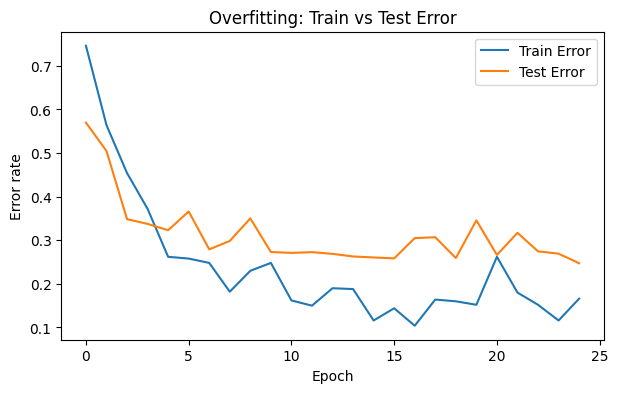

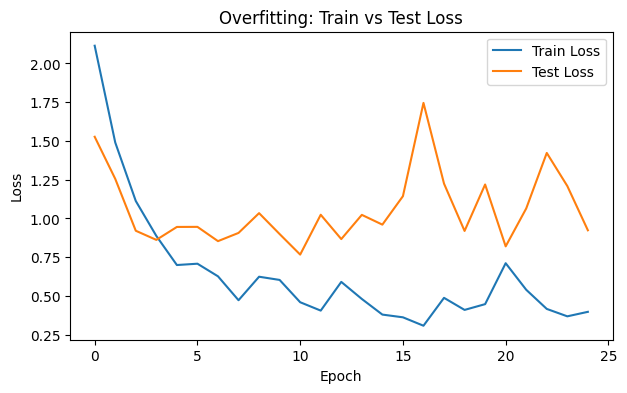

In [14]:
plt.figure(figsize=(7,4))
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Epoch'); plt.ylabel('Error rate')
plt.title('Overfitting: Train vs Test Error')
plt.legend(); plt.show()

plt.figure(figsize=(7,4))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Overfitting: Train vs Test Loss')
plt.legend(); plt.show()


To make the model overfit, we used only 500 training samples and built a large MLP (784→1024→512→256→10) without any regularization or dropout. With so many parameters and so little data, the network can almost memorize the training set, which makes the training loss and error drop very fast. But instead of learning general rules about clothing types, it mainly learns small details from those few examples. Because of this, the test loss stays high and the gap between training and test curves grows during training. This clear difference between train and test results is a classic sign of overfitting: the model does very well on the training data but fails to generalize to new data.

## Part c

[AUG] Epoch 01/25 | train_loss=2.1906 | test_loss=1.8037
[AUG] Epoch 02/25 | train_loss=1.8996 | test_loss=1.8336
[AUG] Epoch 03/25 | train_loss=1.7052 | test_loss=1.3769
[AUG] Epoch 04/25 | train_loss=1.3903 | test_loss=1.2480
[AUG] Epoch 05/25 | train_loss=1.2812 | test_loss=1.1412
[AUG] Epoch 06/25 | train_loss=1.3217 | test_loss=1.1289
[AUG] Epoch 07/25 | train_loss=1.1257 | test_loss=1.0776
[AUG] Epoch 08/25 | train_loss=1.2959 | test_loss=1.0251
[AUG] Epoch 09/25 | train_loss=1.1502 | test_loss=0.9608
[AUG] Epoch 10/25 | train_loss=1.0077 | test_loss=0.8791
[AUG] Epoch 11/25 | train_loss=0.9223 | test_loss=0.9698
[AUG] Epoch 12/25 | train_loss=1.0349 | test_loss=1.0639
[AUG] Epoch 13/25 | train_loss=0.9996 | test_loss=0.8684
[AUG] Epoch 14/25 | train_loss=0.9055 | test_loss=1.0257
[AUG] Epoch 15/25 | train_loss=0.9810 | test_loss=1.0295
[AUG] Epoch 16/25 | train_loss=1.0326 | test_loss=0.8993
[AUG] Epoch 17/25 | train_loss=0.9251 | test_loss=0.9397
[AUG] Epoch 18/25 | train_loss=

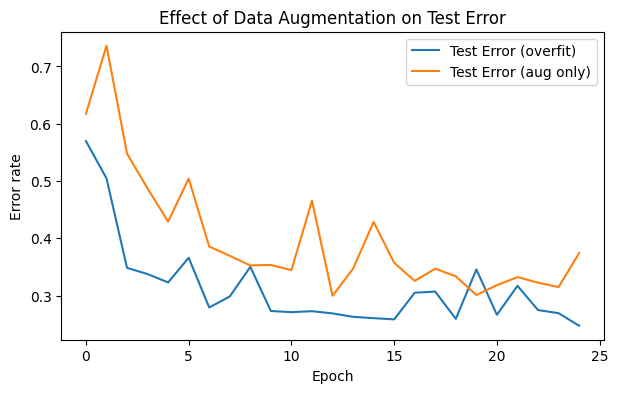

In [15]:
aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset_aug = datasets.FashionMNIST('./data', download=True, train=True, transform=aug_transform)

subset_size = 500
indices = list(range(len(trainset_aug)))
random.shuffle(indices)
small_indices = indices[:subset_size]
small_sampler_aug = SubsetRandomSampler(small_indices)

trainloader_small_aug = torch.utils.data.DataLoader(
    trainset_aug, batch_size=64, sampler=small_sampler_aug, shuffle=False
)

aug_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024), nn.ReLU(inplace=True),
    nn.Linear(1024, 512), nn.ReLU(inplace=True),
    nn.Linear(512, 256), nn.ReLU(inplace=True),
    nn.Linear(256, 10)
)

aug_criterion = nn.CrossEntropyLoss()
aug_optimizer = optim.SGD(aug_model.parameters(), lr=0.1, momentum=0.9)  # بدون regularization

epochs = 25
aug_train_losses, aug_test_losses = [], []
aug_train_errors, aug_test_errors = [], []

for e in range(epochs):
    # train
    aug_model.train()
    run_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader_small_aug:
        images = images.view(images.shape[0], -1)
        aug_optimizer.zero_grad()
        logits = aug_model(images)
        loss = aug_criterion(logits, labels)
        loss.backward()
        aug_optimizer.step()

        run_loss += loss.item() * labels.size(0)
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    tr_loss = run_loss / total
    tr_err  = 1 - (correct/total)

    # test
    aug_model.eval()
    run_loss_t, correct_t, total_t = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            logits = aug_model(images)
            loss = aug_criterion(logits, labels)
            run_loss_t += loss.item() * labels.size(0)
            correct_t += (logits.argmax(1) == labels).sum().item()
            total_t += labels.size(0)

    te_loss = run_loss_t / total_t
    te_err  = 1 - (correct_t/total_t)

    aug_train_losses.append(tr_loss); aug_test_losses.append(te_loss)
    aug_train_errors.append(tr_err);  aug_test_errors.append(te_err)

    print(f"[AUG] Epoch {e+1:02d}/{epochs} | train_loss={tr_loss:.4f} | test_loss={te_loss:.4f}")

plt.figure(figsize=(7,4))
plt.plot(test_errors, label='Test Error (overfit)')
plt.plot(aug_test_errors, label='Test Error (aug only)')
plt.xlabel('Epoch'); plt.ylabel('Error rate')
plt.title('Effect of Data Augmentation on Test Error')
plt.legend(); plt.show()

Data augmentation increases the effective size of the dataset by adding diversity through transformations such as horizontal flipping and small changes in rotation, translation, or scale. This encourages the model to learn more robust and general patterns instead of memorizing the limited training samples. As a result, the gap between training and test error becomes smaller, and the test error curve is usually lower and more stable compared to the overfitting case.

[L2] Epoch 01/25 | test_loss=1.5719
[L2] Epoch 02/25 | test_loss=1.2265
[L2] Epoch 03/25 | test_loss=1.2474
[L2] Epoch 04/25 | test_loss=0.9562
[L2] Epoch 05/25 | test_loss=0.7879
[L2] Epoch 06/25 | test_loss=0.9206
[L2] Epoch 07/25 | test_loss=0.8364
[L2] Epoch 08/25 | test_loss=1.6075
[L2] Epoch 09/25 | test_loss=1.0327
[L2] Epoch 10/25 | test_loss=0.8533
[L2] Epoch 11/25 | test_loss=1.2647
[L2] Epoch 12/25 | test_loss=1.4423
[L2] Epoch 13/25 | test_loss=1.0189
[L2] Epoch 14/25 | test_loss=1.0068
[L2] Epoch 15/25 | test_loss=1.0405
[L2] Epoch 16/25 | test_loss=0.8860
[L2] Epoch 17/25 | test_loss=0.9642
[L2] Epoch 18/25 | test_loss=1.0679
[L2] Epoch 19/25 | test_loss=0.9379
[L2] Epoch 20/25 | test_loss=0.9882
[L2] Epoch 21/25 | test_loss=1.0825
[L2] Epoch 22/25 | test_loss=0.9741
[L2] Epoch 23/25 | test_loss=1.0430
[L2] Epoch 24/25 | test_loss=0.9306
[L2] Epoch 25/25 | test_loss=1.0687


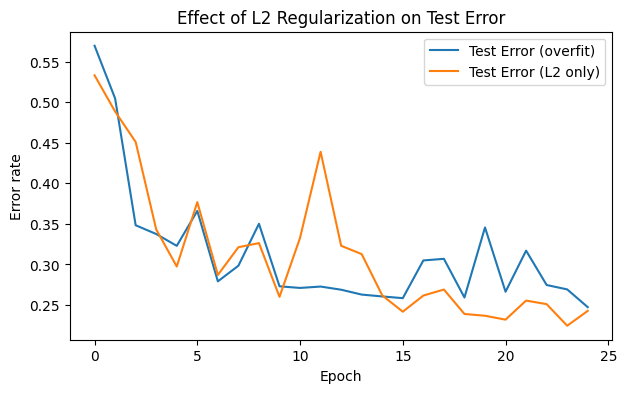

In [16]:
trainloader_small_noaug = torch.utils.data.DataLoader(
    trainset, batch_size=64, sampler=SubsetRandomSampler(small_indices), shuffle=False
)

l2_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024), nn.ReLU(inplace=True),
    nn.Linear(1024, 512), nn.ReLU(inplace=True),
    nn.Linear(512, 256), nn.ReLU(inplace=True),
    nn.Linear(256, 10)
)

l2_criterion = nn.CrossEntropyLoss()
l2_optimizer = optim.SGD(l2_model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)  # ← L2

epochs = 25
l2_test_errors, l2_test_losses = [], []

for e in range(epochs):
    # train
    l2_model.train()
    for images, labels in trainloader_small_noaug:
        images = images.view(images.shape[0], -1)
        l2_optimizer.zero_grad()
        logits = l2_model(images)
        loss = l2_criterion(logits, labels)
        loss.backward()
        l2_optimizer.step()

    # test
    l2_model.eval()
    run_loss_t, correct_t, total_t = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            logits = l2_model(images)
            loss = l2_criterion(logits, labels)
            run_loss_t += loss.item() * labels.size(0)
            correct_t += (logits.argmax(1) == labels).sum().item()
            total_t += labels.size(0)

    te_loss = run_loss_t / total_t
    te_err  = 1 - (correct_t/total_t)
    l2_test_losses.append(te_loss); l2_test_errors.append(te_err)

    print(f"[L2] Epoch {e+1:02d}/{epochs} | test_loss={te_loss:.4f}")

plt.figure(figsize=(7,4))
plt.plot(test_errors, label='Test Error (overfit)')
plt.plot(l2_test_errors, label='Test Error (L2 only)')
plt.xlabel('Epoch'); plt.ylabel('Error rate')
plt.title('Effect of L2 Regularization on Test Error')
plt.legend(); plt.show()